In [1]:
# sample one image from video "5p4b"
from glob import glob
import os

video_file_list = list(glob(os.path.join('videos', '*.m4v')))
print(video_file_list)

['videos\\4p1b_01A2.m4v', 'videos\\5p2b_01A1.m4v', 'videos\\5p4b_01A2.m4v', 'videos\\5p5b_03A1.m4v', 'videos\\7p3b_02M.m4v']


In [2]:
import random
import cv2
import os

random.shuffle(video_file_list)  # inplace
cap = cv2.VideoCapture(video_file_list[0])

if not cap.isOpened():
    print("Error: cannot open video!")
    
sample_image_filename = os.path.join('.', 'images', 'sample_image.jpg')

counter = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print("Done: EOF")
    counter += 1
    
    # print(frame.shape) # <- (2160, 3840, 3)
    if counter == 24:
        cv2.imwrite(sample_image_filename, frame)
        print("Done writing image to %s" % sample_image_filename)
        break

Done writing image to .\images\sample_image.jpg


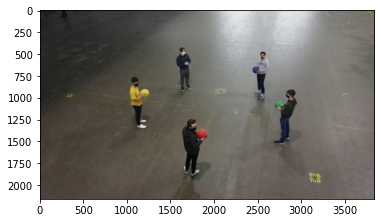

In [3]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline
sample_image_pil = Image.open(sample_image_filename, 'r')
if type(sample_image_pil) != type(np.array([])):
    sample_image_pil = np.asarray(sample_image_pil)
imshow(sample_image_pil)

In [7]:
# Be ready for inference (baseline solution)
import os
os.chdir(r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\baseline\solution')

import os
import sys
sys.path.insert(0, r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\baseline\solution\yolov5')

import argparse
import cv2
import torch
import torch.backends.cudnn as cudnn
import solution
from solution import generateDynColorDict
import track
import time
from yolov5.utils.general import check_img_size
from yolov5.utils.torch_utils import select_device
from main import bbox_rel, compute_color_for_labels, draw_boxes, default_parser
from argparse import Namespace

args = Namespace(
    weights=r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\baseline\solution\yolov5\weights\best.pt',
    data=r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\baseline\solution\ballPerson.yaml',
    source=r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\images',
    output=r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\outputs',
    img_size=640, conf_thres=0.4, iou_thres=0.5, fourcc='mp4v', device='',
    view_img=False, save_txt=False, classes=[0, 1], agnostic_nms=False, augment=False,
    config_deepsort=r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\baseline\solution\deep_sort\configs\deep_sort.yaml',
    groundtruths=None,
    save_img=False, skip_frames=1)

palette = (2 ** 11 - 1, 2 ** 15 - 1, 2 ** 20 - 1)

args.img_size = check_img_size(args.img_size)
groundtruths_path = args.groundtruths

# Select GPU
device = select_device(args.device)
half = device.type != 'cpu'  # half precision only supported on CUDA

#Color tolerance for tracking 
hueOffset = 1
satOffset = 50
valOffset = 20
clr_offs = (hueOffset, satOffset, valOffset)

colorDict = generateDynColorDict(groundtruths_path, clr_offs, args)

t0 = time.perf_counter()   
with torch.no_grad():
    track.detect(args, device, half, colorDict, save_img=args.save_img)
t1 = time.perf_counter()


print('Total Runtime = %.2f' % (t1 - t0))

        
# Finally Revert
os.chdir(r'C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning')



Assigning Colors to IDs
image 1/1 C:\Workspace\study-projects\LPCV\lpcv21-transfer-learning\images\sample_image.jpg: 

TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [ ]:
# import baseline model and ready for first inference with given image above.

!cd baseline && 